In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [72]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.2f}'.format

# #feature_importance.round(3) or do it manually with this code

# Y Axis: The Importance of a Feature
How much the feature is used. The normalized total reduction of the criterion brought by that feature (from https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html). 

# US Houses Dataset

In [73]:
dataset_path_USA = os.path.join('../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df_USA = pd.read_csv(dataset_path_USA + file_name_USA)

X_USA = df_USA.drop(['price'], axis = 1)
y_USA = df_USA['price']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_USA, y_USA)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_USA, y_USA)

feature_importance_USA = pd.Series(index = X_USA.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for USA Housing Dataset', fontsize = 20)

"\ndataset_path_USA = os.path.join('../datasets/USA_houseprices_2014/')\nfile_name_USA = 'preprocessed_data_USAhouseprices2014.csv'\ndf_USA = pd.read_csv(dataset_path_USA + file_name_USA)\n\nX_USA = df_austin.drop(['price'], axis = 1)\ny_USA = df_austin['price']\n\nfrom sklearn.linear_model import ElasticNetCV, ElasticNet\n\ncv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, \n                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, \n                        random_state=42, selection='cyclic')\n\ncv_model.fit(X_USA, y_USA)\n\nmodel = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)\nmodel.fit(X_USA, y_USA)\n\nfeature_importance_USA = pd.Series(index = X_USA.columns, data = np.abs(model.coef_))\n\nn_selected_features = (feature_importance>0).sum()\nprint('{0:d} features, redu

In [74]:
elastic_net_USA = feature_importance_USA.to_frame()
elastic_net_USA['method'] = 'elastic_net'
elastic_net_USA['dataset'] = 'USA_housing'


elastic_net_USA = elastic_net_USA.reset_index(level = 0)
elastic_net_USA.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_USA['feature_rank'] = elastic_net_USA['feature_rank'].rank(method='min', ascending=False)
elastic_net_USA

In [ ]:
elastic_net_USA.to_csv('../data/elastic_net/featureranks_USA.csv', sep=';',index=False)

# Austin Housing Dataset
Target Variable is 'latestPrice'

35 features, reduction of 12.50%


Text(0.5, 1.0, 'Feature Weights for Austin Housing Dataset')

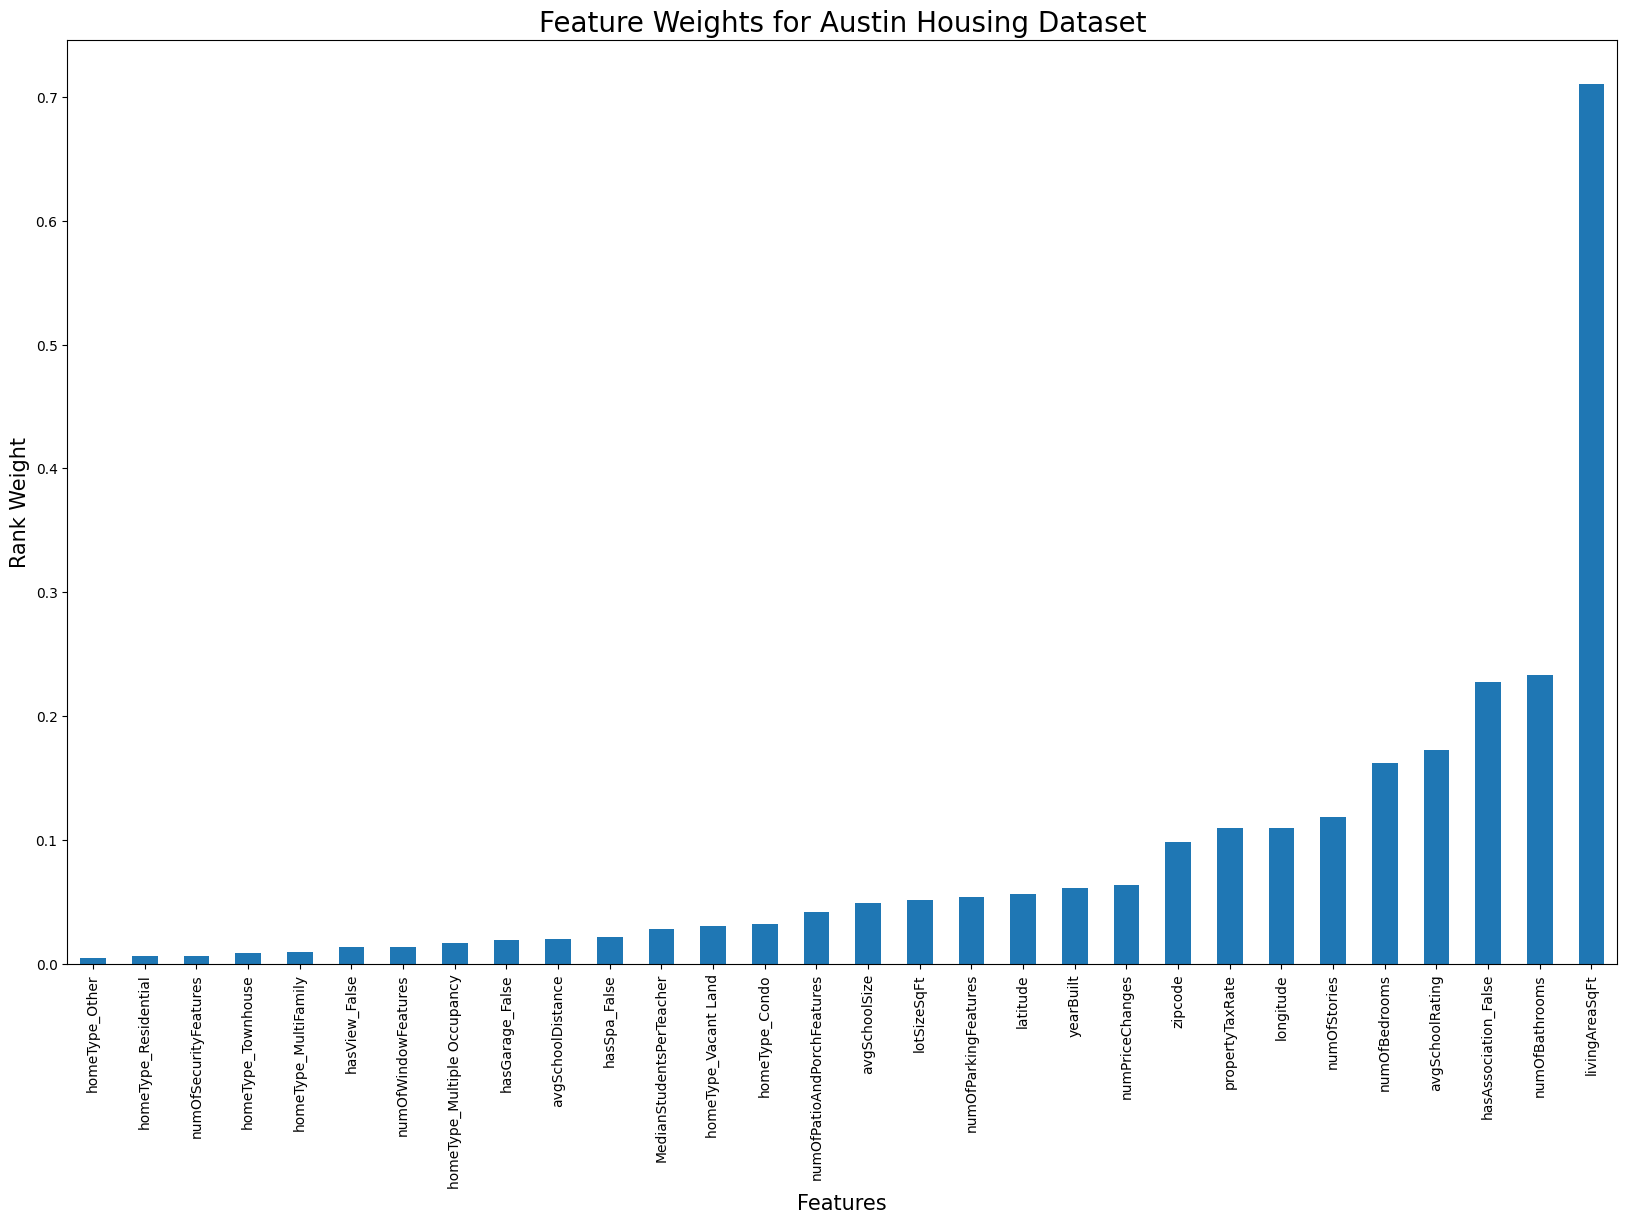

In [75]:
dataset_path_austin = os.path.join('../datasets/austin_housing/')
file_name_austin = 'preprocessed_austin_housing.csv'
df_austin = pd.read_csv(dataset_path_austin + file_name_austin)

X_austin = df_austin.drop(['latestPrice'], axis = 1)
y_austin = df_austin['latestPrice']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_austin, y_austin)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_austin, y_austin)

feature_importance_austin = pd.Series(index = X_austin.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_austin>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_austin))*100))

feature_importance_austin.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Austin Housing Dataset', fontsize = 20)

In [76]:
elastic_net_austin = feature_importance_austin.to_frame()
elastic_net_austin['method'] = 'elastic_net'
elastic_net_austin['dataset'] = 'austin_housing'


elastic_net_austin = elastic_net_austin.reset_index(level = 0)
elastic_net_austin.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_austin['feature_rank'] = elastic_net_austin['feature_rank'].rank(method='min', ascending=False)
elastic_net_austin

,feature_name,feature_rank,method,dataset
0,zipcode,9.00,elastic_net,austin_housing
1,latitude,12.00,elastic_net,austin_housing
2,longitude,7.00,elastic_net,austin_housing
3,propertyTaxRate,8.00,elastic_net,austin_housing
4,garageSpaces,31.00,elastic_net,austin_housing
5,parkingSpaces,36.00,elastic_net,austin_housing
6,yearBuilt,11.00,elastic_net,austin_housing
7,numPriceChanges,10.00,elastic_net,austin_housing
8,numOfAppliances,32.00,elastic_net,austin_housing
9,numOfParkingFeatures,13.00,elastic_net,austin_housing


In [77]:
#elastic_net_austin.to_csv('../data/featureranks_austin_elastic.csv', sep=';',index=False)
elastic_net_austin.to_csv('../data/elastic_net/featureranks_austin.csv', sep=';',index=False)

# Cars Dataset
Target variable is MSRP

6 features, reduction of 87.50%


Text(0.5, 1.0, 'Feature Weights for Austin Housing Dataset')

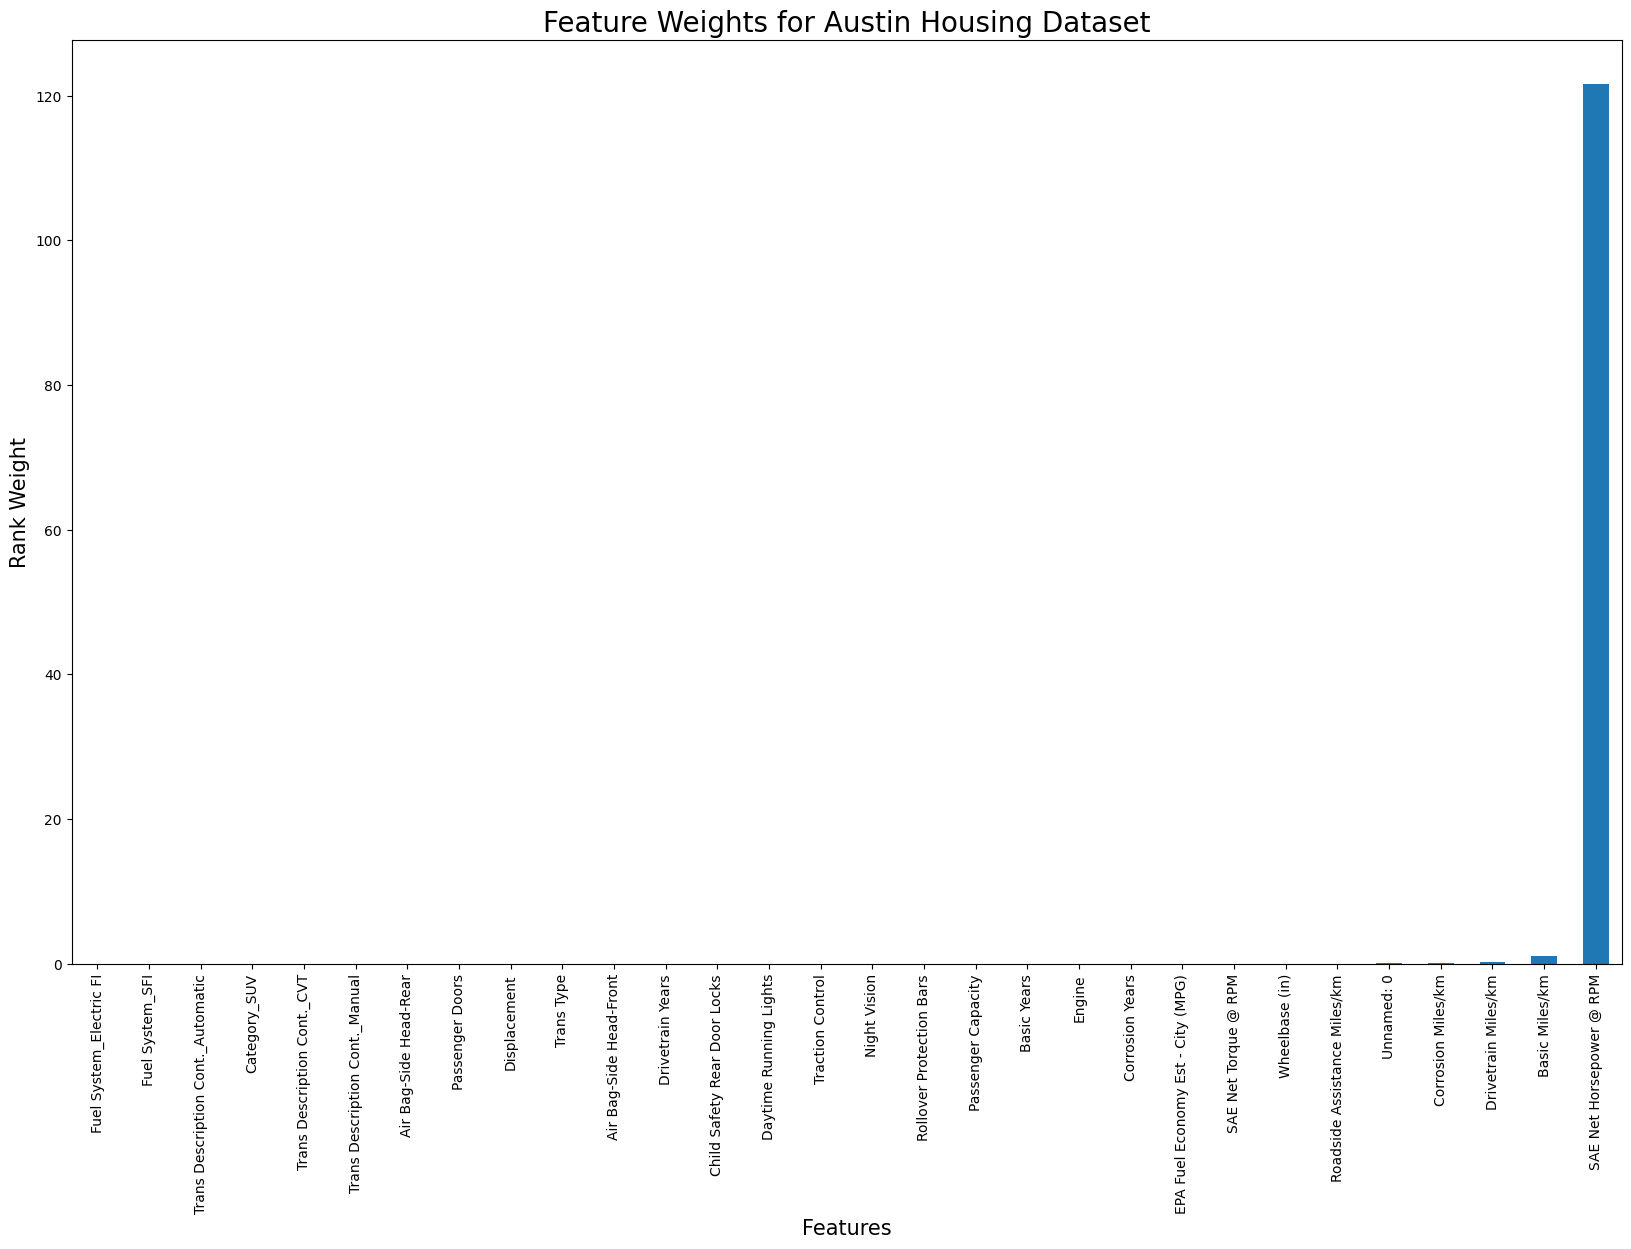

In [15]:
dataset_path_cars = os.path.join('../datasets/cars/')
file_name_cars = 'New_cars_preprocessed.csv'
df_cars = pd.read_csv(dataset_path_cars + file_name_cars)

X_cars = df_cars.drop(['MSRP'], axis = 1)
y_cars = df_cars['MSRP']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_cars, y_cars)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_cars, y_cars)

feature_importance_cars = pd.Series(index = X_cars.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_cars>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_cars))*100))

feature_importance_cars.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Cars Dataset', fontsize = 20)

In [ ]:
elastic_net_cars = feature_importance_cars.to_frame()
elastic_net_cars['method'] = 'elastic_net'
elastic_net_cars['dataset'] = 'cars'


elastic_net_cars = elastic_net_cars.reset_index(level = 0)
elastic_net_cars.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_cars['feature_rank'] = elastic_net_cars['feature_rank'].rank(method='min', ascending=False)
elastic_net_cars

In [ ]:
elastic_net_cars.to_csv('../data/elastic_net/featureranks_cars.csv', sep=';',index=False)

# Airbnb Dataset
Targe Variable is log_price

13 features, reduction of 27.78%


Text(0.5, 1.0, 'Feature Weights for Cars Dataset')

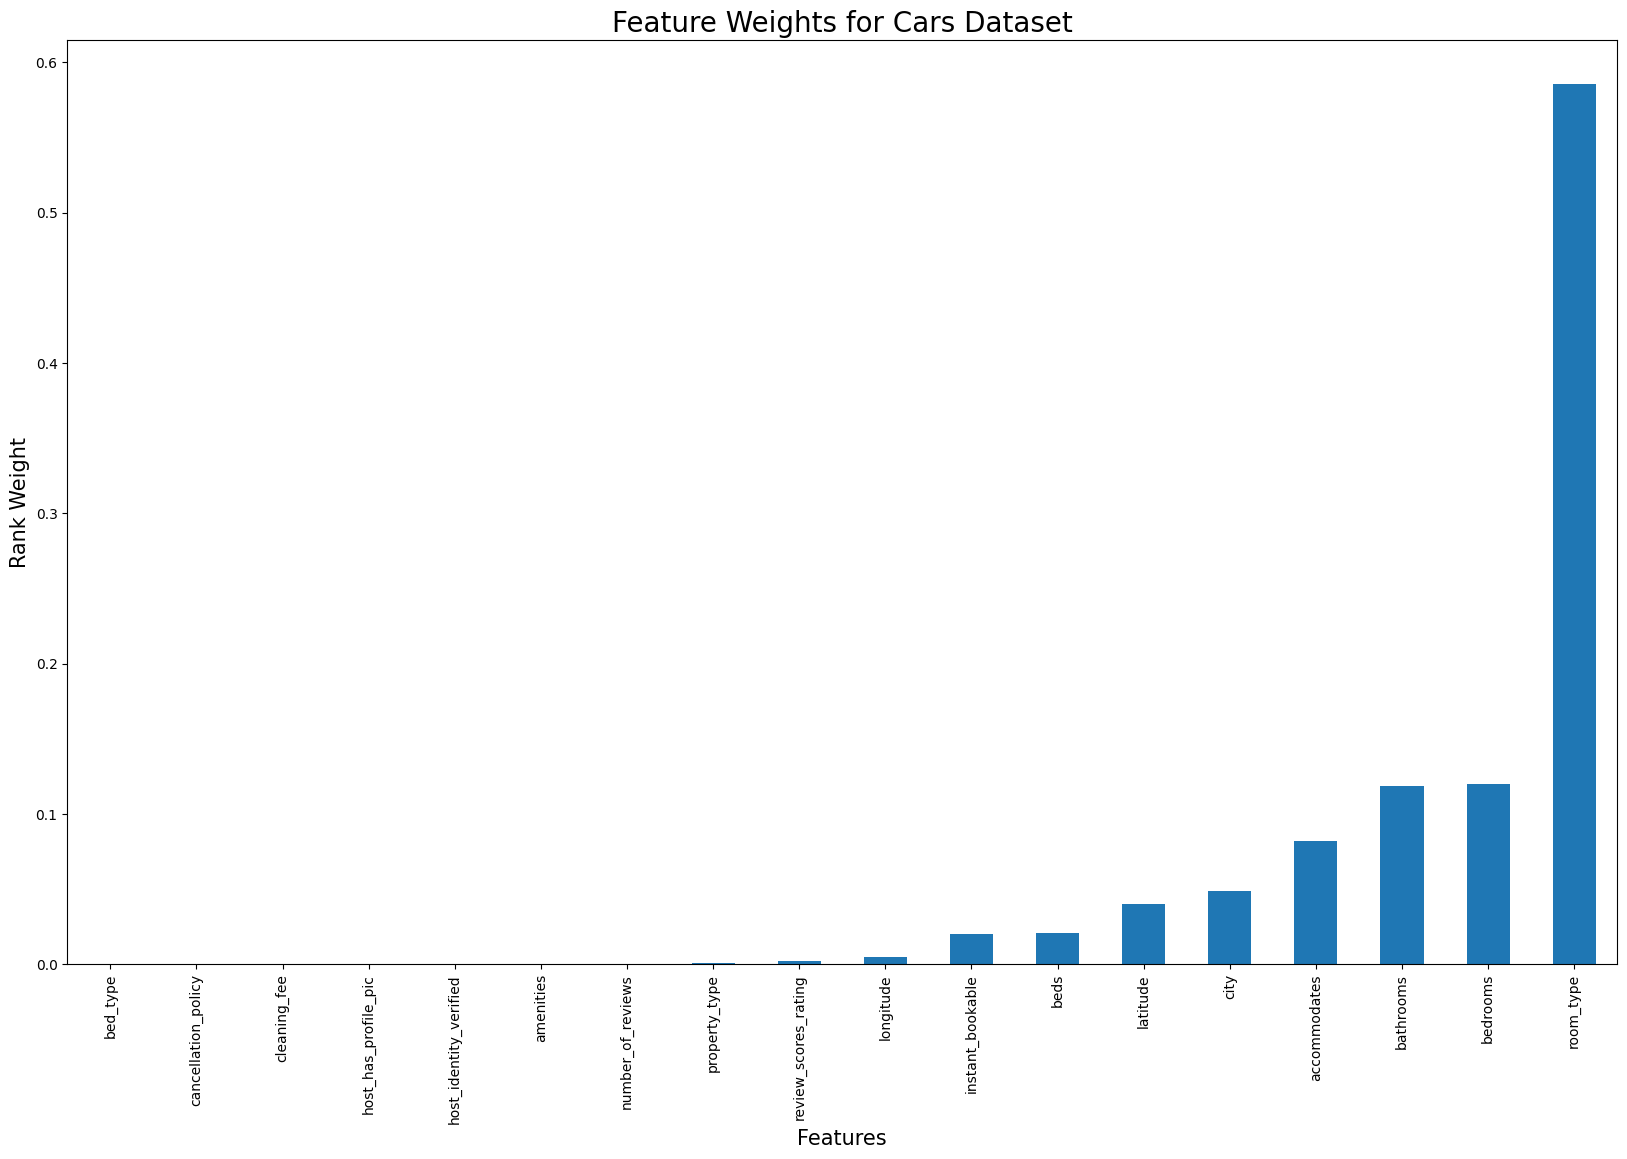

In [18]:
dataset_path_airbnb = os.path.join('../datasets/Airbnb_price/')
file_name_airbnb = 'data_Airbnb_preprocessed.csv'
df_airbnb = pd.read_csv(dataset_path_airbnb + file_name_airbnb, sep = ';')

X_airbnb = df_airbnb.drop(['log_price'], axis = 1)
y_airbnb = df_airbnb['log_price']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_airbnb, y_airbnb)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_airbnb, y_airbnb)

feature_importance_airbnb = pd.Series(index = X_airbnb.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_airbnb>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_airbnb))*100))

feature_importance_airbnb.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Airbnb Dataset', fontsize = 20)

In [ ]:
elastic_net_airbnb = feature_importance_cars.to_frame()
elastic_net_airbnb['method'] = 'elastic_net'
elastic_net_airbnb['dataset'] = 'airbnb'


elastic_net_airbnb = elastic_net_airbnb.reset_index(level = 0)
elastic_net_airbnb.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_airbnb['feature_rank'] = elastic_net_airbnb['feature_rank'].rank(method='min', ascending=False)
elastic_net_airbnb

In [ ]:
elastic_net_airbnb.to_csv('../data/elastic_net/featureranks_airbnb.csv', sep=';',index=False)

# Bike Sharing

In [ ]:
dataset_path_bike = os.path.join('../datasets/Bike Sharing/')
file_name_bike = 'preprocessed_hour.csv'
df_bike = pd.read_csv(dataset_path_bike + file_name_bike, sep = ';')

X_bike = df_bike.drop(['cnt'], axis = 1)
y_bike = df_bike['cnt']

from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X_bike, y_bike)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X_bike, y_bike)

feature_importance_bike = pd.Series(index = X_bike.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_bike>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_bike))*100))

feature_importance_bike.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for Airbnb Dataset', fontsize = 20)

In [ ]:
elastic_net_bike = feature_importance_bike.to_frame()
elastic_net_bike['method'] = 'elastic_net'
elastic_net_bike['dataset'] = 'bike'


elastic_net_bike = elastic_net_bike.reset_index(level = 0)
elastic_net_bike.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_bike['feature_rank'] = elastic_net_bike['feature_rank'].rank(method='min', ascending=False)
elastic_net_bike

In [ ]:
elastic_net_bike.to_csv('../data/elastic_net/featureranks_bike.csv', sep=';',index=False)

In [ ]:
frames = [elastic_net_USA, elastic_net_austin, elastic_net_airbnb, elastic_net_cars, elastic_net_bike]

all_df = pd.concat(frames)
all_df

#all_df.to_csv('../data/featureranks_elastic.csv', sep=';',index=False)